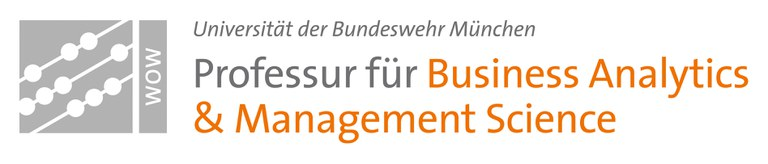

# BITTE ANGLEICHEN MIT "Traveling Salesman Problem - Beispielinstanz Vorlesung - PuLP"

# Maximalfluss
### Universität der Bundeswehr München - Prof. Dr. Claudius Steinhardt - Logistics Analytics
Erstellt von Sebastian Knall am 30.03.2022

#### Das vorliegene Notebook bezieht sich auf das Beispiel 2.1.6 in der Vorlesung Logistics Analytics - Maximalfluss

#### Es soll einen einfachen Einstieg in eine mögliche Lösung des Problems bieten.
#### Hierbei wurde als Solver "PulP" benutzt. Die PulP Bibliothek ist frei mit "pip install pulp" erhältlich.

#### In der vorliegenden möglichen Lösung wurde bewusst ein sehr einfacher Code verwendet. Er soll als Einstieg und Bindeglied zwischen Vorlesung und Python-Programmierung dienen. 

#### Hierbei wurden sämtliche Parameter direkt und einzeln, eins zu eins in Code übertragen.


#### Für einen Einblick, wie ein generischer Python Code mit "PulP" als Solver aussehen könnte, besuchen Sie:

https://mybinder.org/v2/gh/QuantitativeMethoden/Management-Science/HEAD 

#### Für einen Einblick, wie ein generischer Python Code mit "Gurobi" als Solver aussehen könnte, besuchen Sie:

https://mybinder.org/v2/gh/QuantitativeMethoden/Management-Science/HEAD

#### Zum ausführen der Notebooks benötigen Sie eine Lizenz für Gurobi, diese ist unter www.gurobi.com für Studenten kostenfrei erhältlich.

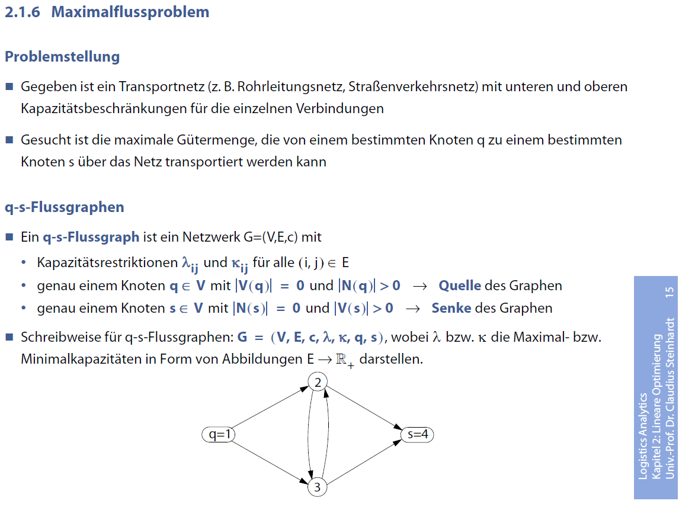

In [17]:
# Importieren der benötigten Bibliotheken
import pulp
from pulp import *

In [18]:
# Erstellen eines neuen PulP-Modells und festlegen ob es ein Maximierungs- oder Minimierungsproblem sein soll.
prob = LpProblem("Maximalfluss", LpMaximize)

In [19]:
# Erstellen der Variablen
## PulP Variablen bestehen aus vier Parametern: Name, Untere Grenze, Obere Grenze und diskret oder linear
### Ist kein Wert für ein Parameter angegeben, so nimmt PulP Standartwerte vor.
#### Hier wurden für die untere und obere Grenze bereits der Minimal- und Maximalfluss der Knoten gewählt.

x12 = LpVariable("Fluss12", 2, 5)
x13 = LpVariable("Fluss13", 0, 4)
x23 = LpVariable("Fluss23", 0, 3)
x24 = LpVariable("Fluss24", 3, 4)
x32 = LpVariable("Fluss32", 1, 2)
x34 = LpVariable("Fluss34", 1, 4)

In [20]:
# Festlegen der Zielfunktion
prob += x12 + x13, "Fluss"

In [21]:
# Unter der Nebenbedingung 1: Flusserhaltung Knoten 2
prob += x12 + x32 == x23 + x24, "NB01"

In [22]:
# Unter der Nebenbedingung 2: Flusserhaltung Knoten 3
prob += x13 + x23 == x32 + x34, "NB02"

In [23]:
# Unter der Nebenbedingung 3: Kapatitäten
# Durch Erstellen der Variablen schon erfüllt

In [24]:
#Problem in eine .lp Datei speichern
prob.writeLP("Maximalfluss.lp")

[Fluss12, Fluss13, Fluss23, Fluss24, Fluss32, Fluss34]

In [25]:
# Modell lösen
prob.solve()

1

In [26]:
# Augeben des Status
print("Status:", LpStatus[prob.status])

Status: Optimal


In [28]:
# Ausgeben der Mengen für die jeweilige Variablen
for v in prob.variables():
    print(v.name, "=", v.varValue)
        
# Ausgeben Gesamtgewinn
print("Maximalfluss: ", value(prob.objective))

Fluss12 = 4.0
Fluss13 = 4.0
Fluss23 = 1.0
Fluss24 = 4.0
Fluss32 = 1.0
Fluss34 = 4.0
Maximalfluss:  8.0
